# AI_Assignment #4
## Machine Learning
### Mohammad Javad Pesarakloo, SID = 810100103 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA
At first, lets load the dataset as a pandas dataframe:

In [ ]:
df = pd.read_excel('DataSet.xlsx')
df.head()

In [ ]:
df.info()
df.describe()

Now that we have an overall view of the data, lets find missing datas

In [ ]:
df.isna().sum(axis=0)

As we see, we have several missing items in our dataset.Now lets visualize unique values of each coloumn:

In [ ]:
values = {x:np.unique(df[x].to_numpy()) for x in df.columns.tolist()}
uniqeVals = [len(values[key]) for key in values.keys()]
plt.figure(figsize=(10, 6))
plt.plot(values.keys(), uniqeVals, color='red')
plt.title("numberOfUniqueVals")
plt.grid()
plt.xlabel("feature")
plt.ylabel("count")

In [ ]:
correlationMatrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm')

In the above heatMap, we have correlation matrix of the dataframe in which the warmer the color, the more the correlated the features are.For example we can see that the feature **RM** is mostly correlated with the target variable

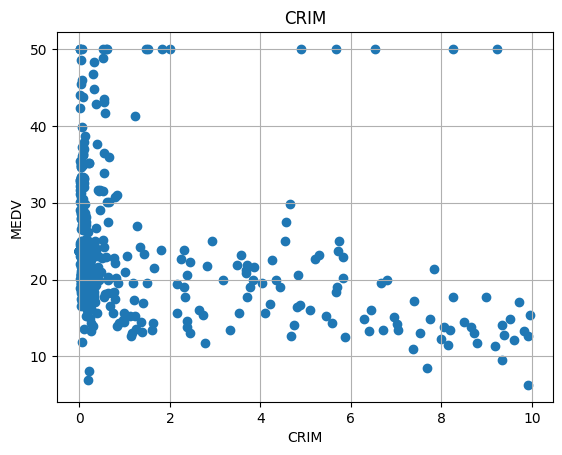

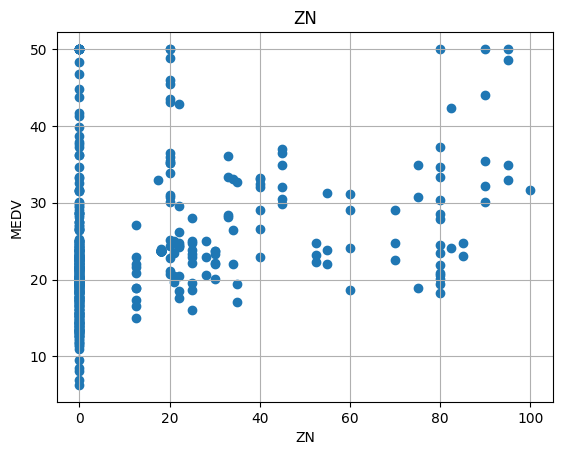

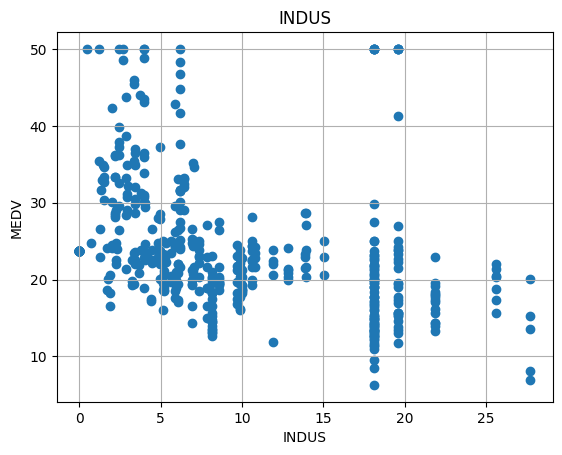

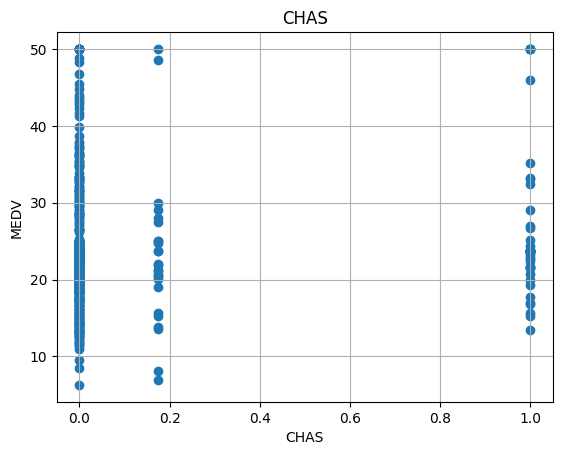

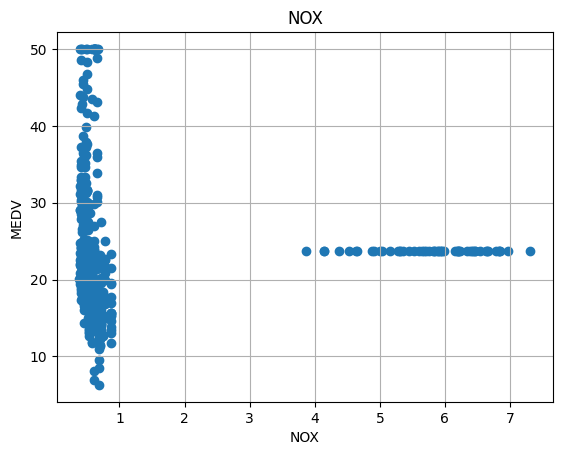

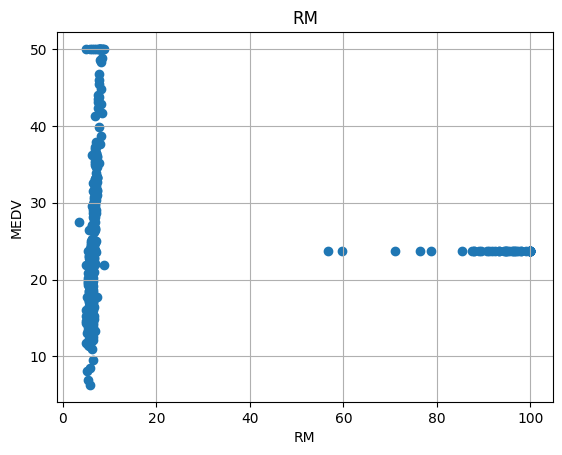

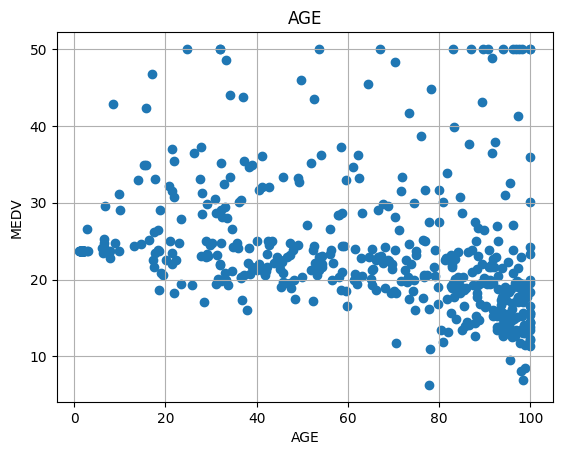

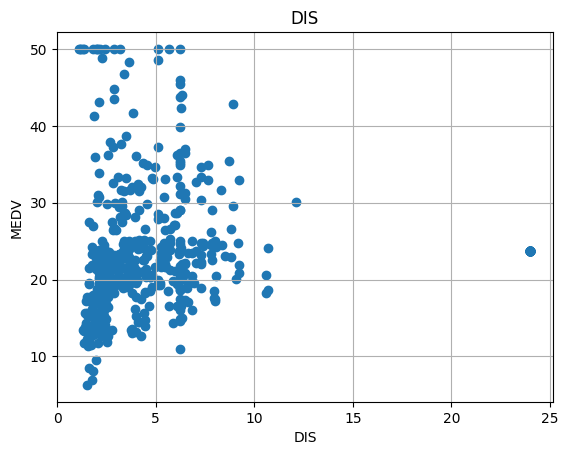

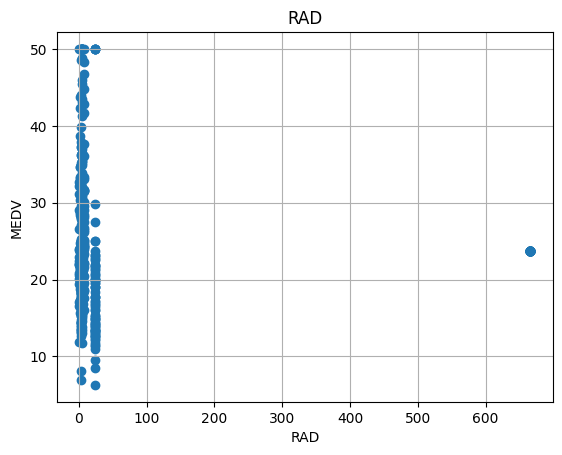

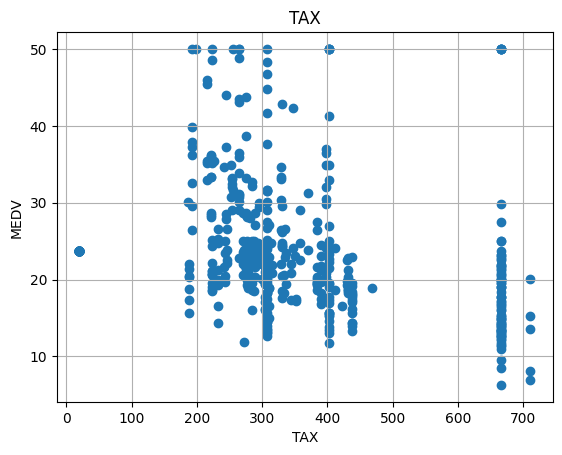

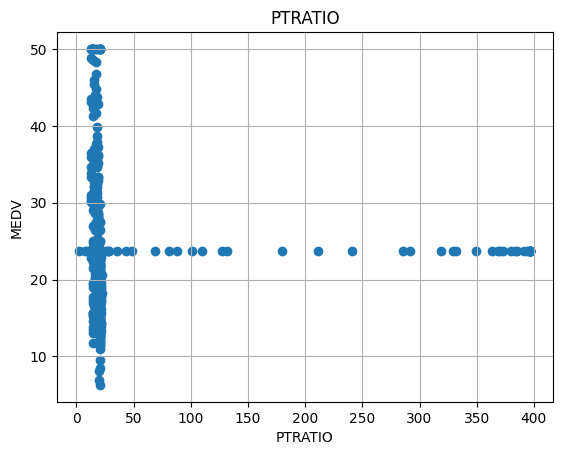

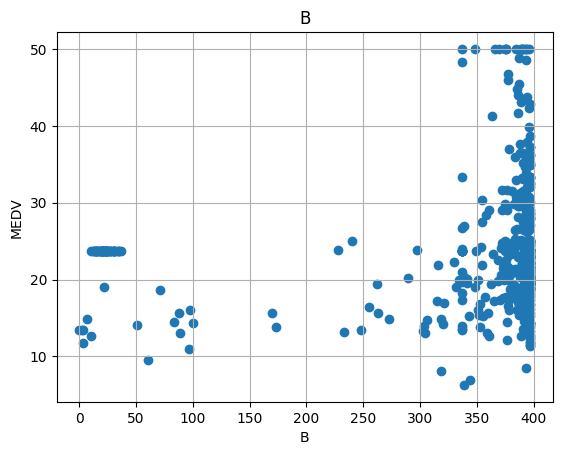

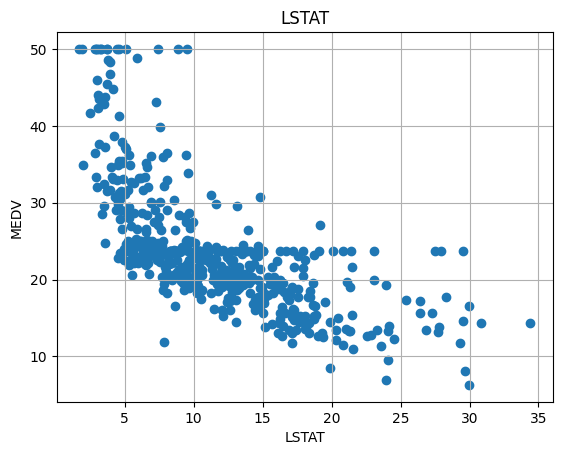

In [18]:
for feature in df.columns[0:-1]:
    plt.figure()
    plt.scatter(df[feature], df.iloc[:, -1])
    plt.title(feature)
    plt.grid()
    plt.xlabel(feature)
    plt.ylabel("MEDV")

In the above scatter plots, we can see the relation of a feature and target variable.For example feature **RM** looks more like a line than other features and can be used for linear regression.A **hexbin** plot is a type of data visualization that displays the frequency of occurrences within a dataset in a two-dimensional space. It’s particularly useful for managing and representing large datasets with overlapping points where a scatter plot would be less effective due to overplotting.Lets visualize hexbin plot of the dataset.

In [ ]:
for feature in df.columns[0:-1]:
    plt.figure()
    plt.hexbin(df[feature], df.iloc[:, -1], gridsize=20)
    plt.title(feature)
    plt.grid()
    plt.xlabel(feature)
    plt.ylabel("MEDV")

Another metric we can use to visualize data is the **histogram** of features.plotting histogram, we can see the shape of it's pdf and see which features looks more like the target variable:

In [ ]:
fig, axes = plt.subplots(2, 13, figsize=(30, 9))
for j, feature_ in enumerate(df.columns[0:-1]):
    sns.histplot(df[feature_], ax= axes[0, j], kde = True)
    sns.histplot(df.iloc[:, -1], ax= axes[1, j], kde = True)
plt.tight_layout()
plt.show()

from the above histplot, we can see that **Lstat** looks more like the target variable

# Preprocessing
One of the most important steps in a machine learning project is the preprocessing step through which we change the format of train data to make it more adaptive for our model.lets explore different phases of preprocessing.
## Handling missing values
In each dataset, some items might be unvailable.There are different methods that can be used in different cases;The method we use totally depends on the format of the dataset.For example when number of missing values is very low, we can easily ommit that row of data;but when it is high, which is usually the case, we should apply some other methods.Here are three methods of handling missing values:
### 1-Removing the sample
Suppose we have a sample with 10 features, 7 of which are not available, we can remove this samples because most of its features are not available.

In [13]:
max(df.isna().sum(axis=1))

2

As we see, in our dataset in each row, we have at most two missing values;thus it is not wise to romove any sample and we should use other methods.
### 2-Replacing the missing item with mean
Suppose the feature X is not available in some rows, we can easily replace this item with the mean value of availbe Xs:

In [15]:
df.fillna(df.mean(), inplace=True)

In [17]:
df.isna().sum().sum()

0

### 3-Replacing with median
This method is exactly the same as the above method but instead of mean, we are using median

Features in each dataset can be either **numerical** or **categorical**.The difference is that numercial features can have any continous values while categorial features are discrete.From the scatter plot, we can see that the feature **CHAS** is categorical while others are numerical.

## Standardizing and Normalizing
Normalizing and standardizing are two common techniques used in preprocessing data in machine learning to improve the performance of machine learning models.
### 1-Normalizing
Normalizing is the process of scaling the numerical features of a dataset to a standard range, typically between 0 and 1. This is done by subtracting the minimum value of the feature and dividing by the range (maximum value - minimum value). Normalizing ensures that all features have the same scale, which can help the model converge faster and avoid bias towards features with larger scales.
$$
    n = \frac{x - l}{m - l}
$$
### 2-Standardizing
Standardizing is the process of transforming the numerical features of a dataset to have a mean of 0 and a standard deviation of 1. This is done by subtracting the mean of the feature and dividing by the standard deviation. Standardizing ensures that the features have a similar distribution, which can help improve the performance of models that are sensitive to the scale of the features, such as linear models and neural networks.
$$
    n = \mathcal{N}(\frac{x - \mu}{\sigma^2})
$$

These methods are definitely required in this project because if not applied, our model will be biased to features which have greater scale than others despite having any priority to them.

# Linear Regression

Main form of simple linear regression function:
$$f(x) = \alpha x + \beta$$

here we want to find the bias ($\alpha$) and slope($\beta$) by minimizing the derivation of the Residual Sum of Squares (RSS) function:

- step 1: Compute RSS of the training data  

$$ RSS = \Sigma (y_i - (\hat{\beta} + \hat{\alpha} * x_i) )^2 $$

- step 2: Compute the derivatives of the RSS function in terms of $\alpha$ and $\beta$, and set them equal to 0 to find the desired parameters

$$ \frac{\partial RSS}{\partial \beta} = \Sigma (-f(x_i) + \hat{\beta} + \hat{\alpha} * x_i) = 0$$
$$ \to \beta = \hat{y} - \hat{\alpha} \hat{x} \to (1)$$


$$ \frac{\partial RSS}{\partial \alpha} = \Sigma (-2 x_i y_i + 2 \hat{\beta} x_i + 2\hat{\alpha} x_i ^ 2) = 0 \to (2)$$

$$ (1) , (2) \to \hat{\alpha} = \frac{\Sigma{(x_i - \hat{x})(y_i - \hat{y})}}{\Sigma{(x_i - \hat{x})^2}}
$$
$$ \hat{\beta} = y - \hat{a} x$$



Based on the above formula, implement the function below to compute the parameters of a simple linear regression

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
def linear_regression(input, output):
  alpha = (np.sum((input - np.mean(input))*(output - np.mean(output)))) / (np.sum(np.power(input - np.mean(input), 2)))
  beta = np.mean(output) - alpha*np.mean(input)
  return [alpha, beta]

Now complete this `get_regression_predictions(...)` function to predict the value of given data based on the calculated intercept and slope

In [ ]:
def get_regression_predictions(input, intercept, slope):
    return input*slope + intercept

Now that we have a model and can make predictions, let's evaluate our model using Root Mean Square Error (RMSE). RMSE is the square root of the mean of the squared differences between the residuals, and the residuals is just a fancy word for the difference between the predicted output and the true output.

Complete the following function to compute the RSME of a simple linear regression model given the input_feature, output, intercept and slope:

In [ ]:
def get_root_mean_square_error(predicted_values, actual_values):
  return np.sqrt((1/(len(actual_values))) * np.sum(np.power(predicted_values - actual_values, 2)))

The RMSE has no bound, thus it becomes challenging to determine whether a particular RMSE value is considered good or bad without any reference point. Instead, we use R2 score. The R2 score is calculated by comparing the sum of the squared differences between the actual and predicted values of the dependent variable to the total sum of squared differences between the actual and mean values of the dependent variable. The R2 score is formulated as below:

$$R^2 = 1 - \frac{SSres}{SStot} = 1 - \frac{\sum_{i=1}^{n} (y_{i,true} - y_{i,pred})^2}{\sum_{i=1}^{n} (y_{i,true} - \bar{y}_{true})^2} $$

Complete the following function to calculate the R2 score of a given input_feature, output, bias, and slope:

In [ ]:
def get_r2_score(predicted_values, actual_values):
  mean_yMain = sum(actual_values) / len(actual_values)
    
  tss = sum((y - mean_yMain) ** 2 for y in actual_values)
    
  rss = sum((actual_values[i] - predicted_values[i]) ** 2 for i in range(len(actual_values)))
  
  r2 = 1 - (rss / tss)
  
  return r2


Now calculate the fitness of the model.
Remember to provide explanation for the outputs in your code!

In [ ]:
designated_feature_list = [] # ToDo

for feature in designated_feature_list:
  pass
  #TO DO

# Ploynomial Regression

To extend the simple linear regression to polynomial regression, we can model the relationship between the independent variable $x$ and the dependent variable $y$ as a polynomial function of degree $n$:

$$f(x) = \beta_0 + \beta_1x + \beta_2x^2 + \ldots + \beta_nx^n$$

The steps to find the parameters $\beta_i$ are similar to those in simple linear regression. We again minimize the RSS function by taking the derivatives with respect to each parameter and setting them to 0.

- Step 1: Compute the RSS function for polynomial regression:

$$ RSS = \Sigma (y_i - (\hat{\beta_0} + \hat{\beta_1}x_i + \hat{\beta_2}x_i^2 + \ldots + \hat{\beta_n}x_i^n))^2 $$

- Step 2: Compute the derivatives of the RSS function with respect to each parameter $\beta_i$ and set them to 0 to find the desired parameters.

$$ \frac{\partial RSS}{\partial \beta_i} = 0, \text{ for } i = 0, 1, 2, \ldots, n$$

Solving these equations will give us the optimal values of $\beta_i$ for the polynomial regression model. The specific form of the equations will depend on the degree of the polynomial and the number of parameters.

The general form for finding the coefficients for polynomial regression can be represented as:

$$ \beta = (X^T X)^{-1} X^T y $$

where:
- $X$ is the design matrix with columns $x^0, x^1, x^2, ..., x^n$
- $x^i$ represents the feature vector of $x$ raised to the power of $i$
- $y$ is the target variable vector
- $\beta$ is the coefficient vector for the polynomial regression

By solving for $\beta$ using the above formula, we can obtain the coefficients for the polynomial regression model.

In [ ]:
def polynomial_regression(x, y, degree):
  X = np.array([np.power(x, i) for i in range(degree+1)])
  return np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), y)

## Computing the Derivative

As we saw, the cost function is the sum over the data points of the squared difference between an observed output and a predicted output.

Since the derivative of a sum is the sum of the derivatives, we can compute the derivative for a single data point and then sum over data points. We can write the squared difference between the observed output and predicted output for a single point as follows:

$$
(output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))^2
$$

With n feautures and a const , So the derivative will be :


$$
2 * (output  - (const* w _{0} + [feature_1] * w_{1} + ...+ [feature_n] * w_{n}  ))
$$

The term inside the paranethesis is just the error (difference between prediction and output). So we can re-write this as:

$$2 * error*[feature_i] $$


That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself. In the case of the constant then this is just twice the sum of the errors!

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors.


With this in mind, complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points).


In [ ]:
def feature_derivative(errors, feature):
  #TO DO
  pass

## Gradient Descent

Now we will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of increase and therefore the negative gradient is the direction of decrease and we're trying to minimize a cost function.


The amount by which we move in the negative gradient direction is called the 'step size'. We stop when we are 'sufficiently close' to the optimum. We define this by requiring that the magnitude (length) of the gradient vector to be smaller than a fixed 'tolerance'.


With this in mind, complete the following gradient descent function below using your derivative function above. For each step in the gradient descent we update the weight for each feature befofe computing our stopping criteria.

In [ ]:
# Utility functions for multiple regression

def normalize_features(chosen_features, data_frame):
    for feature in chosen_features:
        data_frame[feature] = (data_frame[feature] - data_frame[feature].mean()) / data_frame[feature].std()
    return data_frame

def predict_output(feature_matrix, weights, bias):
    #TO DO FOR POLYNOMIAL REGRESSION PREDICTION
    return predictions



## Polynomial Regression Using Gradient Descent

Polynomial regression using gradient descent involves finding the optimal parameters for a polynomial model by iteratively updating them based on the gradient of a loss function, typically the Mean Squared Error (MSE). The steps involved are as follows:

- **Step 1: Define the polynomial model**
The polynomial model has the form:
$$f(x) = \beta_0 + \beta_1x + \beta_2x^2 + \ldots + \beta_nx^n$$

- **Step 2: Define the loss function**
The loss function, such as Mean Squared Error (MSE), measures the error between the actual target values and the predicted values by the model.

- **Step 3: Initialize the coefficients**
Start with initial guesses for the coefficients $\beta_0, \beta_1, \ldots, \beta_n$

- **Step 4: Update the coefficients using Gradient Descent**
Iteratively update the coefficients to minimize the loss function. This is done by computing the gradient of the loss function with respect to each coefficient and making small adjustments in the opposite direction of the gradient.

- **Step 5: Repeat until convergence**
Continue updating the coefficients iteratively until the algorithm converges to the optimal values.

- **Step 6: Use the learned coefficients for prediction**
Once the coefficients converge, they can be used in the polynomial function to make predictions on new data points.

Overall, polynomial regression using gradient descent is an iterative optimization process that aims to find the best-fitting polynomial curve to the data points by minimizing the prediction errors. The learning rate and the number of iterations are key hyperparameters to tune for efficient convergence and accurate modeling.



In [ ]:
def polynomial_regression_gradient_descent(feature_matrix, outputs, initial_weights,bias, step_size, tolerance):
    weights = np.array(initial_weights)

    while True:
        # Compute predictions using polynomial function and errors
        #TO DO

        # Compute derivatives for all weights
        #TO DO

        # Update weights and bias
        #TO DO

        # Check convergence
        #TO DO

    return weights, bias

In [ ]:

def run_polynomial_regression(chosen_feature_matrix, target_matrix, keywords):
    initial_weights = keywords['initial_weights']
    step_size = keywords['step_size']
    tolerance = keywords['tolerance']
    bias = keywords['bias']
    weights = np.array(initial_weights)
    weights, bias = polynomial_regression_gradient_descent(chosen_feature_matrix, target_matrix, weights, bias, step_size, tolerance)

    return weights, bias

def get_weights_and_bias(chosen_features):

    keywords = {
        'initial_weights': np.array([.5]*len(chosen_features)),
        'step_size': 1.e-4,
        'tolerance': 1.e-10,
        'bias': 0
    }

    # TO DO

    return chosen_feature_matrix, train_weights, bias